## Combine all South East Asian Features into one Dataframe

In [517]:
import pandas as pd

In [518]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [519]:
tobacco_use_ww = pd.read_csv("Data/tobacco_use_ww.csv") # done | j | hm

In [520]:
tobbacco_production = pd.read_csv("Data/tobacco_production.csv") # done

In [521]:
stop_smoking = pd.read_csv("Data/stop_smoking.csv") # done || j | hm | p

In [522]:
sales_per_day = pd.read_csv("Data/sales_per_day.csv") # done || j | hm | p 

In [523]:
death_rates_smoking_age = pd.read_csv("Data/death_rates_smoking_age.csv")# done || j hm | p

In [524]:
SEA_Countries = tobacco_use_ww[tobacco_use_ww["ParentLocation"]=="South-East Asia"]["Location"].unique()[1:]

In [525]:
SEA_Countries_Code = tobacco_use_ww[tobacco_use_ww["ParentLocation"]=="South-East Asia"]["SpatialDimValueCode"].unique()[1:]

In [526]:
drsmaDict = dict(pd.read_csv("Data/death_rates_smoking_age.csv")[["Entity","Code"]].values)

In [527]:
spdDict = dict(pd.read_csv("Data/sales_per_day.csv")[["Entity","Code"]].values)

In [528]:
ssDict = dict(pd.read_csv("Data/stop_smoking.csv")[["Entity","Code"]].values)

In [529]:
tuDict = dict(pd.read_csv("Data/tobacco_use_ww.csv")[["Location","SpatialDimValueCode"]].values)

In [530]:
drsmaDict.update(spdDict)
drsmaDict.update(ssDict)
drsmaDict.update(tuDict)


In [531]:
len(drsmaDict)

254

## Tobacco use

In [532]:
#SEAtobacco_use = tobacco_use_ww[tobacco_use_ww["ParentLocation"]=="South-East Asia"]

In [533]:
tobacco_useP = tobacco_use_ww.rename({"SpatialDimValueCode":"Code"},axis=1)[["Code","Year","Gender","Value"]]

In [534]:
tobacco_useP = tobacco_useP.pivot_table("Value",["Code"],["Year","Gender"])

In [535]:
tobacco_useP.columns = [x[1]+"_"+str(x[0]) for x in tobacco_useP.columns]

In [536]:
tobacco_useP

,Both sexes_2000,Female_2000,Male_2000,Both sexes_2005,Female_2005,Male_2005,Both sexes_2010,Female_2010,Male_2010,Both sexes_2013,...,Male_2015,Both sexes_2016,Female_2016,Male_2016,Both sexes_2017,Female_2017,Male_2017,Both sexes_2018,Female_2018,Male_2018
Code,,,,,,,,,,,,,,,,,,,,,
ALB,34.2,11.1,57.4,32.7,10.0,55.3,31.1,9.1,53.2,30.3,...,51.4,29.7,8.2,51.1,29.3,8.0,50.6,29.2,7.9,50.5
AND,36.3,29.9,42.6,35.4,29.6,41.2,34.7,29.5,39.9,34.3,...,38.8,33.9,29.4,38.4,33.9,29.4,38.4,33.8,29.5,38.1
ARE,21.8,1.3,42.3,20.6,1.1,40.0,19.4,1.0,37.9,19.0,...,36.5,18.5,0.8,36.1,18.5,0.8,36.1,18.2,0.8,35.6
ARG,46.2,39.0,53.5,37.1,29.7,44.6,30.1,22.9,37.2,26.6,...,31.3,23.6,17.0,30.2,22.7,16.2,29.2,21.8,15.4,28.2
ARM,34.3,2.6,66.1,32.3,2.2,62.4,30.0,1.9,58.2,28.9,...,54.1,27.5,1.6,53.5,27.3,1.6,52.9,26.7,1.6,51.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,41.3,24.1,58.5,37.2,21.8,52.5,33.5,19.7,47.4,31.6,...,43.0,29.9,17.5,42.2,29.3,17.2,41.5,28.9,16.9,40.8
YEM,30.9,17.5,44.2,27.4,14.6,40.2,24.5,12.2,36.9,23.0,...,34.0,21.7,9.9,33.5,21.3,9.6,33.0,20.9,9.3,32.5
ZAF,38.1,28.9,47.3,35.8,24.6,47.0,33.9,20.9,46.9,32.8,...,46.7,32.0,17.2,46.9,31.6,16.6,46.5,31.4,16.0,46.8


## tobbacco_production

In [537]:
((_,metricTons),(_,MilUsd)) = list(tobbacco_production.drop("Value Footnotes",axis=1).groupby("Unit"))

In [538]:
metricTons = metricTons.pivot_table("Value",["Country or Area"],["Year"])

In [539]:
MilUsd = MilUsd.pivot_table("Value",["Country or Area"],["Year"])

In [540]:
drsmaDict.update({"China, Macao Special Administrative Region":"MAC",
                  "The former Yugoslav Republic of Macedonia":"MKD",
                   "Cabo Verde":"CPV",
                   "Syrian Arab Republic":"SYR",
                   "Viet Nam":"VNM"})

In [541]:
MilUsd = MilUsd.reset_index()

MilUsd["Code"] = MilUsd["Country or Area"].apply(lambda x: drsmaDict[x])

In [542]:
MilUsd = MilUsd.drop("Country or Area",axis=1).set_index("Code")

In [543]:
MilUsd.head()

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Code,,,,,,,,,,,,,,,,,,,,,
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.517025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
AZE,NaN,NaN,NaN,NaN,NaN,3.240836,5.798243,1.697244,1.527268,1.933458,...,1.048800,2.799349,3.732349,6.104810,8.737646,6.491478,7.137931,9.817077,6.929778,7.457441
BIH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.469845,NaN,5.349070
BRA,NaN,NaN,NaN,NaN,NaN,2.475959,14.444471,1.262481,1.019495,4.268069,...,51.457204,77.499482,57.614741,55.702043,70.476139,70.444313,74.455796,90.393659,98.170738,NaN


In [544]:
MilUsd.columns = ["MilUsd_"+str(x) for x in MilUsd.columns]

In [545]:
MilUsd.head()

,MilUsd_1995,MilUsd_1996,MilUsd_1997,MilUsd_1998,MilUsd_1999,MilUsd_2000,MilUsd_2001,MilUsd_2002,MilUsd_2003,MilUsd_2004,...,MilUsd_2007,MilUsd_2008,MilUsd_2009,MilUsd_2010,MilUsd_2011,MilUsd_2012,MilUsd_2013,MilUsd_2014,MilUsd_2015,MilUsd_2016
Code,,,,,,,,,,,,,,,,,,,,,
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.517025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
AZE,NaN,NaN,NaN,NaN,NaN,3.240836,5.798243,1.697244,1.527268,1.933458,...,1.048800,2.799349,3.732349,6.104810,8.737646,6.491478,7.137931,9.817077,6.929778,7.457441
BIH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.469845,NaN,5.349070
BRA,NaN,NaN,NaN,NaN,NaN,2.475959,14.444471,1.262481,1.019495,4.268069,...,51.457204,77.499482,57.614741,55.702043,70.476139,70.444313,74.455796,90.393659,98.170738,NaN


In [546]:
metricTons = metricTons.reset_index()

In [547]:
metricTons["Code"] = metricTons["Country or Area"].apply(lambda x: drsmaDict[x])

In [548]:
metricTons = metricTons.drop("Country or Area",axis=1).set_index("Code")

In [549]:
#metricTons.drop("index",axis=1,inplace=True)

In [550]:
metricTons.columns = ["metricTons_"+str(x) for x in metricTons.columns]

In [551]:
metricTons.head()

,metricTons_1995,metricTons_1996,metricTons_1997,metricTons_1998,metricTons_1999,metricTons_2000,metricTons_2001,metricTons_2002,metricTons_2003,metricTons_2004,...,metricTons_2007,metricTons_2008,metricTons_2009,metricTons_2010,metricTons_2011,metricTons_2012,metricTons_2013,metricTons_2014,metricTons_2015,metricTons_2016
Code,,,,,,,,,,,,,,,,,,,,,
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DZA,7803.6,8307.1,8382.3,8497.5,8326.0,8145.8,7063.2,7099.6,7153.4,6976.0,...,7734.0,7103.0,8068.0,8273.0,8612.0,8130.0,8241.0,7648.0,7483.0,NaN
AUS,23083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
AZE,13585.0,8539.0,10134.0,5317.0,7761.0,5869.0,8622.0,4030.0,2293.0,2548.0,...,1038.8,1479.2,1543.0,2027.0,2558.7,1963.6,2112.0,2430.2,1691.5,1946.9


## stop smoking

In [552]:
stop_smoking

,Entity,Code,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit
0,Algeria,DZA,2012,1.84,47.0,4,3
1,Algeria,DZA,2014,2.09,40.9,4,4
2,Argentina,ARG,2012,2.79,69.9,4,4
3,Argentina,ARG,2014,3.47,69.7,4,5
4,Armenia,ARM,2012,1.69,38.4,2,4
...,...,...,...,...,...,...,...
769,Yemen,YEM,2010,NaN,NaN,4,3
770,Zambia,ZMB,2007,NaN,NaN,2,3
771,Zambia,ZMB,2010,NaN,NaN,2,3
772,Zimbabwe,ZWE,2007,NaN,NaN,2,3


In [553]:
stop_smoking = stop_smoking.drop("Entity",axis=1).pivot_table(["AvgCigarettePriceDollars","AvgTaxesAsPctCigarettePrice","EnforceBansTobaccoAd","HelpToQuit"],"Code","Year")

In [554]:
stop_smoking.columns

MultiIndex([(   'AvgCigarettePriceDollars', 2012),
            (   'AvgCigarettePriceDollars', 2014),
            ('AvgTaxesAsPctCigarettePrice', 2012),
            ('AvgTaxesAsPctCigarettePrice', 2014),
            (       'EnforceBansTobaccoAd', 2007),
            (       'EnforceBansTobaccoAd', 2010),
            (       'EnforceBansTobaccoAd', 2012),
            (       'EnforceBansTobaccoAd', 2014),
            (                 'HelpToQuit', 2007),
            (                 'HelpToQuit', 2010),
            (                 'HelpToQuit', 2012),
            (                 'HelpToQuit', 2014)],
           names=[None, 'Year'])

In [555]:
stop_smoking.columns = [x[0]+"_"+str(x[1]) for x in stop_smoking.columns]

In [556]:
stop_smoking.columns

Index(['AvgCigarettePriceDollars_2012', 'AvgCigarettePriceDollars_2014',
       'AvgTaxesAsPctCigarettePrice_2012', 'AvgTaxesAsPctCigarettePrice_2014',
       'EnforceBansTobaccoAd_2007', 'EnforceBansTobaccoAd_2010',
       'EnforceBansTobaccoAd_2012', 'EnforceBansTobaccoAd_2014',
       'HelpToQuit_2007', 'HelpToQuit_2010', 'HelpToQuit_2012',
       'HelpToQuit_2014'],
      dtype='object')

## Sales Per Day

In [61]:
sales_per_day["Code"].unique()

array(['ARM', 'AUS', 'AUT', 'AZE', 'BLR', 'BEL', 'BGR', 'CAN', 'HRV',
       'CZE', 'OWID_CZS', 'DNK', 'EST', 'FIN', 'FRA', 'GEO', 'DEU', 'GRC',
       'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KAZ', 'KGZ', 'LVA',
       'LTU', 'MDA', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'ROU', 'RUS',
       'SVK', 'SVN', 'ESP', 'SWE', 'CHE', nan, 'GBR', 'USA', 'OWID_YGS'],
      dtype=object)

In [62]:
sales_per_day

,Entity,Code,Year,amt
0,Armenia,ARM,1988,12.0
1,Armenia,ARM,1989,11.6
2,Armenia,ARM,1990,11.9
3,Armenia,ARM,1991,9.3
4,Armenia,ARM,1992,4.9
...,...,...,...,...
2762,Yugoslavia,OWID_YGS,1988,8.9
2763,Yugoslavia,OWID_YGS,1989,8.5
2764,Yugoslavia,OWID_YGS,1990,8.5
2765,Yugoslavia,OWID_YGS,1991,7.8


In [63]:
sales_per_day = sales_per_day.drop("Entity",axis=1).pivot_table("amt","Code","Year")

In [64]:
sales_per_day.columns

Int64Index([1875, 1880, 1885, 1890, 1895, 1900, 1901, 1902, 1903, 1904,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='Year', length=121)

In [65]:
sales_per_day.columns = ["sales_per_day_"+str(x) for x in sales_per_day.columns]

In [66]:
sales_per_day

,sales_per_day_1875,sales_per_day_1880,sales_per_day_1885,sales_per_day_1890,sales_per_day_1895,sales_per_day_1900,sales_per_day_1901,sales_per_day_1902,sales_per_day_1903,sales_per_day_1904,...,sales_per_day_2006,sales_per_day_2007,sales_per_day_2008,sales_per_day_2009,sales_per_day_2010,sales_per_day_2011,sales_per_day_2012,sales_per_day_2013,sales_per_day_2014,sales_per_day_2015
Code,,,,,,,,,,,,,,,,,,,,,
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,4.1,4.2,4.1,4.0,NaN,NaN,NaN,NaN,NaN
AUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.8,6.0,5.5,5.7,6.3,5.2,NaN,NaN,NaN,NaN
BGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.1,8.8,8.3,6.6,5.7,5.8,6.0,5.9,NaN
BLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.4,3.2,3.0,3.1,3.5,NaN,NaN,NaN,NaN,NaN
CHE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.8,5.4,5.7,5.6,NaN,NaN,NaN,NaN,NaN,NaN


## Death Rates Smoking Age

In [67]:
#SEAdeath_rates_smoking_age = death_rates_smoking_age[death_rates_smoking_age["Code"].isin(SEA_Countries_Code)]

In [68]:
death_rates_smoking_age = death_rates_smoking_age[["Code","Year","All_ages"]]

In [69]:
death_rates_smoking_age = death_rates_smoking_age.pivot_table("All_ages",["Code"],"Year")

In [70]:
death_rates_smoking_age["avg"]  = death_rates_smoking_age.mean(axis=1)

In [71]:
death_rates_smoking_age.columns = ["deathRate_"+str(x) for x in death_rates_smoking_age.columns]

In [72]:
death_rates_smoking_age

,deathRate_1990,deathRate_1991,deathRate_1992,deathRate_1993,deathRate_1994,deathRate_1995,deathRate_1996,deathRate_1997,deathRate_1998,deathRate_1999,...,deathRate_2009,deathRate_2010,deathRate_2011,deathRate_2012,deathRate_2013,deathRate_2014,deathRate_2015,deathRate_2016,deathRate_2017,deathRate_avg
Code,,,,,,,,,,,,,,,,,,,,,
AFG,63.895905,61.846347,53.436511,47.044347,45.799808,44.109036,42.616425,41.579362,40.860275,41.321832,...,31.247881,30.217384,29.381074,28.781991,28.220176,27.932338,28.022238,28.089774,28.127580,38.164768
AGO,55.336126,54.801691,54.408293,54.548736,54.350016,53.309461,51.136809,49.881300,51.131919,49.606460,...,37.483408,36.474249,35.738155,35.259244,34.368768,32.861465,32.254396,31.642266,31.241130,43.738552
ALB,74.382434,77.920510,76.411919,74.282222,71.288005,73.440844,78.489728,82.127025,79.656276,81.806467,...,111.709564,115.427724,120.979960,125.819761,131.187072,138.039816,142.594122,146.334116,150.430709,102.009951
AND,93.263925,90.882328,92.000151,92.692981,95.420198,97.005635,96.703684,96.117648,96.124110,96.674642,...,96.511500,97.479604,94.942909,94.117218,95.583268,96.203202,96.668713,98.398278,99.682713,95.704627
ARE,14.665647,15.020761,15.390174,15.793874,16.180918,16.545835,16.628807,16.636072,16.878859,17.186851,...,11.091580,12.190815,13.568159,15.153034,16.899626,18.850733,20.952964,23.309480,25.815678,16.368323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,75.035643,75.388561,76.085998,76.470094,77.398664,78.205475,79.713423,79.546347,79.401109,79.533028,...,83.451667,83.799083,84.419556,85.233666,85.914899,86.721893,87.662583,88.713239,89.826213,81.374341
YEM,51.297551,50.484856,49.962191,49.534796,49.099109,48.579422,48.038072,47.483146,46.797839,46.129998,...,40.246683,39.816276,39.717770,39.648357,39.615008,39.668574,40.098227,40.632389,41.227174,44.052553
ZAF,76.176405,76.320858,77.521622,76.440371,79.258249,80.497273,88.541623,97.014771,99.182676,99.033443,...,79.872171,74.751062,69.731238,65.676539,62.209338,59.963270,58.783959,57.704270,54.446049,81.575526


## Combine the dataframes

In [197]:
cbd = pd.DataFrame().join([sales_per_day,stop_smoking,tobacco_useP, MilUsd, metricTons,death_rates_smoking_age], how="outer")

In [198]:
cbd

,sales_per_day_1875,sales_per_day_1880,sales_per_day_1885,sales_per_day_1890,sales_per_day_1895,sales_per_day_1900,sales_per_day_1901,sales_per_day_1902,sales_per_day_1903,sales_per_day_1904,...,deathRate_2009,deathRate_2010,deathRate_2011,deathRate_2012,deathRate_2013,deathRate_2014,deathRate_2015,deathRate_2016,deathRate_2017,deathRate_avg
Code,,,,,,,,,,,,,,,,,,,,,
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,157.604674,158.193740,157.347861,154.793002,151.965976,152.945949,155.521200,157.698508,160.937278,146.401481
AUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.937099,90.311414,89.008526,86.244432,85.153877,86.258485,86.949177,87.432138,90.044181,112.444347
AUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,133.635017,133.228540,132.642904,132.660391,132.734686,132.167783,132.558398,130.503704,130.810203,149.268659
AZE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.117496,105.727189,107.543445,108.698056,110.439626,111.145857,112.375811,115.433004,119.478056,105.697292
BEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,210.104951,205.116231,202.717193,201.716429,196.704442,187.920342,186.732065,180.402488,177.372323,223.091072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OWID_WRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.514093,93.410851,92.921823,92.438707,91.444032,91.596550,92.865602,93.278283,92.914638,99.092821
PRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.800901,50.108974,51.618709,49.528151,49.445728,48.576678,47.753056,49.456884,50.895463,51.929262
PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.865474,23.943285,23.277929,22.956603,22.702146,22.725609,22.819894,23.017349,23.464853,29.086355


In [199]:
cbd.isnull().sum()

sales_per_day_1875    206
sales_per_day_1880    206
sales_per_day_1885    206
sales_per_day_1890    206
sales_per_day_1895    206
                     ... 
deathRate_2014         11
deathRate_2015         11
deathRate_2016         11
deathRate_2017         11
deathRate_avg          11
Length: 233, dtype: int64

In [76]:
cbd.isnull().sum(axis=1)

Code
ARM         154
AUS          73
AUT          81
AZE         115
BEL          69
           ... 
OWID_WRL    204
PRI         204
PSE         204
TWN         204
VIR         204
Length: 207, dtype: int64

In [77]:
pd.to_pickle(cbd,"Data/combined_ww.pkl")

In [113]:
sales_per_day.isnull().sum()

sales_per_day_1875    43
sales_per_day_1880    43
sales_per_day_1885    43
sales_per_day_1890    43
sales_per_day_1895    43
                      ..
sales_per_day_2011    21
sales_per_day_2012    24
sales_per_day_2013    29
sales_per_day_2014    31
sales_per_day_2015    41
Length: 121, dtype: int64

In [110]:
[int(x.split("_")[3]) for x in sales_per_day.columns]

[1875,
 1880,
 1885,
 1890,
 1895,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [131]:
[x.split("_")[1] for x in death_rates_smoking_age.columns]

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 'avg']

In [162]:
death = death_rates_smoking_age[["deathRate_" + str(x) for x in range(1990,2016)]]

In [163]:
sales = sales_per_day[["sales_per_day_"+str(x) for x in range(1990,2016)]]

In [156]:
death

,deathRate_1990,deathRate_1991,deathRate_1992,deathRate_1993,deathRate_1994,deathRate_1995,deathRate_1996,deathRate_1997,deathRate_1998,deathRate_1999,...,deathRate_2006,deathRate_2007,deathRate_2008,deathRate_2009,deathRate_2010,deathRate_2011,deathRate_2012,deathRate_2013,deathRate_2014,deathRate_2015
Code,,,,,,,,,,,,,,,,,,,,,
AFG,63.895905,61.846347,53.436511,47.044347,45.799808,44.109036,42.616425,41.579362,40.860275,41.321832,...,33.411416,32.948717,31.987048,31.247881,30.217384,29.381074,28.781991,28.220176,27.932338,28.022238
AGO,55.336126,54.801691,54.408293,54.548736,54.350016,53.309461,51.136809,49.881300,51.131919,49.606460,...,41.020701,39.579764,38.334680,37.483408,36.474249,35.738155,35.259244,34.368768,32.861465,32.254396
ALB,74.382434,77.920510,76.411919,74.282222,71.288005,73.440844,78.489728,82.127025,79.656276,81.806467,...,106.084992,105.322171,109.281032,111.709564,115.427724,120.979960,125.819761,131.187072,138.039816,142.594122
AND,93.263925,90.882328,92.000151,92.692981,95.420198,97.005635,96.703684,96.117648,96.124110,96.674642,...,91.884797,92.599684,93.900754,96.511500,97.479604,94.942909,94.117218,95.583268,96.203202,96.668713
ARE,14.665647,15.020761,15.390174,15.793874,16.180918,16.545835,16.628807,16.636072,16.878859,17.186851,...,16.134745,14.367152,12.740261,11.091580,12.190815,13.568159,15.153034,16.899626,18.850733,20.952964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,75.035643,75.388561,76.085998,76.470094,77.398664,78.205475,79.713423,79.546347,79.401109,79.533028,...,81.446661,82.251658,82.323431,83.451667,83.799083,84.419556,85.233666,85.914899,86.721893,87.662583
YEM,51.297551,50.484856,49.962191,49.534796,49.099109,48.579422,48.038072,47.483146,46.797839,46.129998,...,41.541615,41.019428,40.594763,40.246683,39.816276,39.717770,39.648357,39.615008,39.668574,40.098227
ZAF,76.176405,76.320858,77.521622,76.440371,79.258249,80.497273,88.541623,97.014771,99.182676,99.033443,...,92.448940,88.360958,84.224488,79.872171,74.751062,69.731238,65.676539,62.209338,59.963270,58.783959


In [157]:
sales

,sales_per_day_1990,sales_per_day_1991,sales_per_day_1992,sales_per_day_1993,sales_per_day_1994,sales_per_day_1995,sales_per_day_1996,sales_per_day_1997,sales_per_day_1998,sales_per_day_1999,...,sales_per_day_2006,sales_per_day_2007,sales_per_day_2008,sales_per_day_2009,sales_per_day_2010,sales_per_day_2011,sales_per_day_2012,sales_per_day_2013,sales_per_day_2014,sales_per_day_2015
Code,,,,,,,,,,,,,,,,,,,,,
ARM,11.9,9.3,4.9,5.5,5.7,5.6,5.6,5.6,5.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUS,7.6,7.3,7.3,6.6,6.4,6.3,5.6,5.6,5.4,5.1,...,4.1,4.1,4.2,4.1,4.0,NaN,NaN,NaN,NaN,NaN
AUT,6.3,6.4,6.1,5.8,5.9,5.6,5.4,5.7,6.4,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZE,4.4,5.2,3.8,1.1,3.3,3.3,3.3,3.4,3.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BEL,6.0,6.1,5.9,5.6,5.5,6.0,6.3,6.4,6.7,6.8,...,6.8,6.0,5.5,5.7,6.3,5.2,NaN,NaN,NaN,NaN
BGR,4.7,6.0,7.1,7.5,6.0,6.4,7.6,7.4,7.2,7.6,...,NaN,8.1,8.8,8.3,6.6,5.7,5.8,6.0,5.9,NaN
BLR,4.3,4.7,4.7,4.6,4.8,4.8,5.1,5.2,5.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAN,7.0,6.3,6.4,6.0,6.6,5.9,6.2,5.8,5.8,5.7,...,3.4,3.2,3.0,3.1,3.5,NaN,NaN,NaN,NaN,NaN
CHE,7.8,7.8,8.2,7.6,7.4,7.3,7.2,7.0,7.1,6.8,...,5.8,5.4,5.7,5.6,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
combined_sales = pd.concat([death, sales.reindex(death.index)], axis=1)

In [194]:
combined_sales

TypeError: 'DataFrame' object is not callable

<AxesSubplot:xlabel='sales_per_day_1990', ylabel='deathRate_1990'>

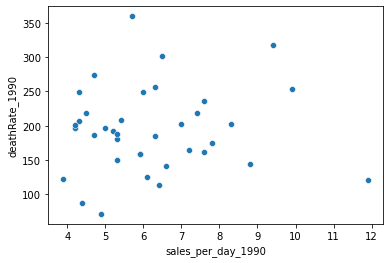

In [164]:
sns.scatterplot(data = combined_sales, x ="sales_per_day_1990", y ="deathRate_1990")

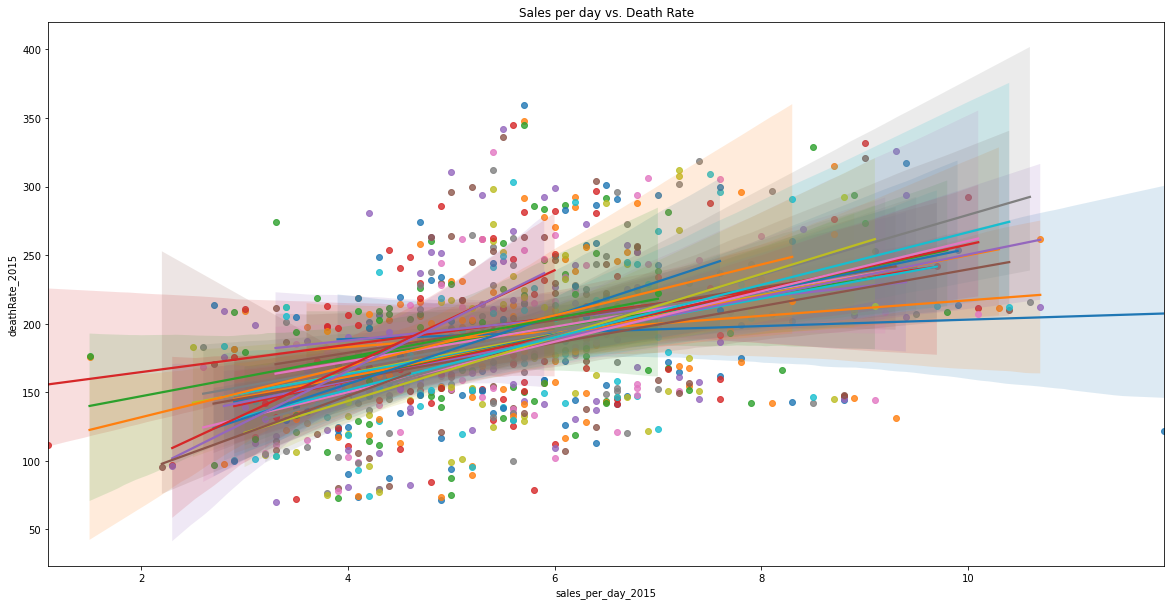

In [221]:
fig, ax = plt.subplots(figsize=(20,10))
for year in range(1990, 2016):
    sns.regplot(data = combined_sales,
                   x="sales_per_day_" + str(year),
                   y="deathRate_" + str(year),
                    label =year)
plt.title("Sales per day vs. Death Rate");


In [173]:
cbd

,sales_per_day_1875,sales_per_day_1880,sales_per_day_1885,sales_per_day_1890,sales_per_day_1895,sales_per_day_1900,sales_per_day_1901,sales_per_day_1902,sales_per_day_1903,sales_per_day_1904,...,deathRate_2009,deathRate_2010,deathRate_2011,deathRate_2012,deathRate_2013,deathRate_2014,deathRate_2015,deathRate_2016,deathRate_2017,deathRate_avg
Code,,,,,,,,,,,,,,,,,,,,,
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,157.604674,158.193740,157.347861,154.793002,151.965976,152.945949,155.521200,157.698508,160.937278,146.401481
AUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.937099,90.311414,89.008526,86.244432,85.153877,86.258485,86.949177,87.432138,90.044181,112.444347
AUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,133.635017,133.228540,132.642904,132.660391,132.734686,132.167783,132.558398,130.503704,130.810203,149.268659
AZE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.117496,105.727189,107.543445,108.698056,110.439626,111.145857,112.375811,115.433004,119.478056,105.697292
BEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,210.104951,205.116231,202.717193,201.716429,196.704442,187.920342,186.732065,180.402488,177.372323,223.091072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OWID_WRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.514093,93.410851,92.921823,92.438707,91.444032,91.596550,92.865602,93.278283,92.914638,99.092821
PRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.800901,50.108974,51.618709,49.528151,49.445728,48.576678,47.753056,49.456884,50.895463,51.929262
PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.865474,23.943285,23.277929,22.956603,22.702146,22.725609,22.819894,23.017349,23.464853,29.086355


In [224]:
[int(x.split("_")[1]) for x in tobacco_useP.columns]

[2000,
 2000,
 2000,
 2005,
 2005,
 2005,
 2010,
 2010,
 2010,
 2013,
 2013,
 2013,
 2014,
 2014,
 2014,
 2015,
 2015,
 2015,
 2016,
 2016,
 2016,
 2017,
 2017,
 2017,
 2018,
 2018,
 2018]

In [179]:
[x.split("_")[1] for x in death_rates_smoking_age.columns]

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 'avg']

In [225]:
death = death_rates_smoking_age[["deathRate_" + str(x) for x in (2005,2010,2013,2014,2015,2017)]]

In [226]:
death

,deathRate_2005,deathRate_2010,deathRate_2013,deathRate_2014,deathRate_2015,deathRate_2017
Code,,,,,,
AFG,34.001298,30.217384,28.220176,27.932338,28.022238,28.127580
AGO,41.789103,36.474249,34.368768,32.861465,32.254396,31.241130
ALB,104.883689,115.427724,131.187072,138.039816,142.594122,150.430709
AND,93.071347,97.479604,95.583268,96.203202,96.668713,99.682713
ARE,15.388499,12.190815,16.899626,18.850733,20.952964,25.815678
...,...,...,...,...,...,...
WSM,80.689158,83.799083,85.914899,86.721893,87.662583,89.826213
YEM,42.083661,39.816276,39.615008,39.668574,40.098227,41.227174
ZAF,93.452590,74.751062,62.209338,59.963270,58.783959,54.446049


In [222]:
tobacco_useP

,Both sexes_2000,Female_2000,Male_2000,Both sexes_2005,Female_2005,Male_2005,Both sexes_2010,Female_2010,Male_2010,Both sexes_2013,...,Male_2015,Both sexes_2016,Female_2016,Male_2016,Both sexes_2017,Female_2017,Male_2017,Both sexes_2018,Female_2018,Male_2018
Code,,,,,,,,,,,,,,,,,,,,,
ALB,34.2,11.1,57.4,32.7,10.0,55.3,31.1,9.1,53.2,30.3,...,51.4,29.7,8.2,51.1,29.3,8.0,50.6,29.2,7.9,50.5
AND,36.3,29.9,42.6,35.4,29.6,41.2,34.7,29.5,39.9,34.3,...,38.8,33.9,29.4,38.4,33.9,29.4,38.4,33.8,29.5,38.1
ARE,21.8,1.3,42.3,20.6,1.1,40.0,19.4,1.0,37.9,19.0,...,36.5,18.5,0.8,36.1,18.5,0.8,36.1,18.2,0.8,35.6
ARG,46.2,39.0,53.5,37.1,29.7,44.6,30.1,22.9,37.2,26.6,...,31.3,23.6,17.0,30.2,22.7,16.2,29.2,21.8,15.4,28.2
ARM,34.3,2.6,66.1,32.3,2.2,62.4,30.0,1.9,58.2,28.9,...,54.1,27.5,1.6,53.5,27.3,1.6,52.9,26.7,1.6,51.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,41.3,24.1,58.5,37.2,21.8,52.5,33.5,19.7,47.4,31.6,...,43.0,29.9,17.5,42.2,29.3,17.2,41.5,28.9,16.9,40.8
YEM,30.9,17.5,44.2,27.4,14.6,40.2,24.5,12.2,36.9,23.0,...,34.0,21.7,9.9,33.5,21.3,9.6,33.0,20.9,9.3,32.5
ZAF,38.1,28.9,47.3,35.8,24.6,47.0,33.9,20.9,46.9,32.8,...,46.7,32.0,17.2,46.9,31.6,16.6,46.5,31.4,16.0,46.8


In [243]:
male = tobacco_useP[["Male_" + str(x) for x in (2005,2010,2013,2014,2015,2017)]]


In [244]:
female = tobacco_useP[["Female_" + str(x) for x in (2005,2010,2013,2014,2015,2017)]]

In [245]:
both = tobacco_useP[["Both sexes_" + str(x) for x in (2005,2010,2013,2014,2015,2017)]]

In [246]:
combined_male=pd.concat([death, male.reindex(male.index)], axis=1)

In [247]:
combined_female = pd.concat([death, female.reindex(female.index)], axis=1)

In [248]:
combined_both = pd.concat([death, both.reindex(both.index)], axis=1)

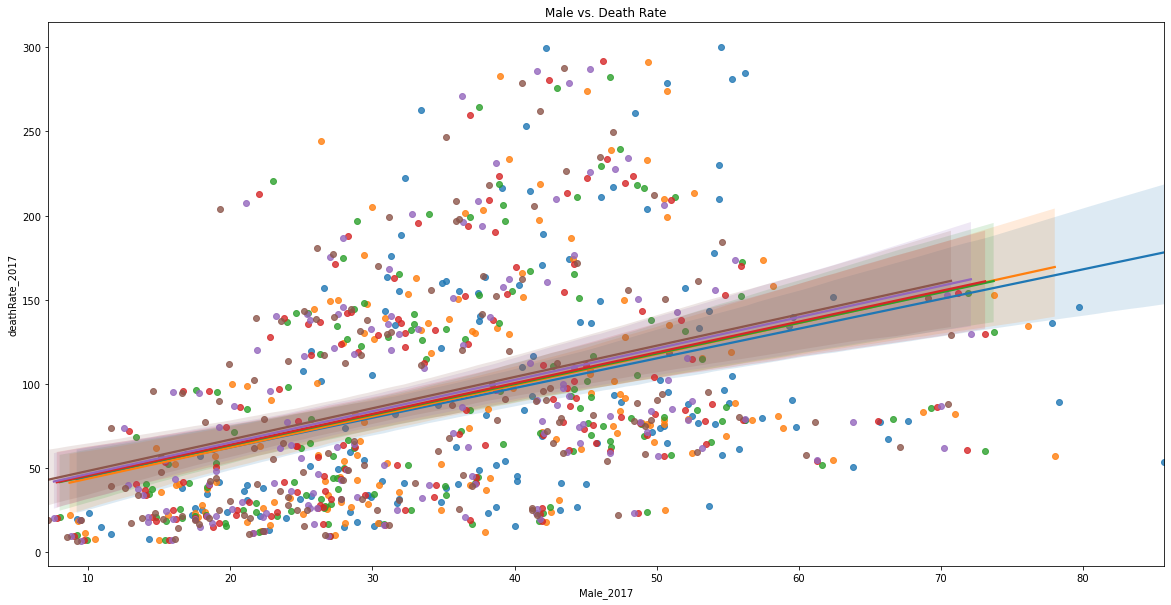

In [240]:
fig, ax = plt.subplots(figsize=(20,10))
for year in (2005,2010,2013,2014,2015,2017):
    sns.regplot(data = combined_male,
                   x="Male_" + str(year),
                   y="deathRate_" + str(year),
                    label =year)
plt.title("Male vs. Death Rate");

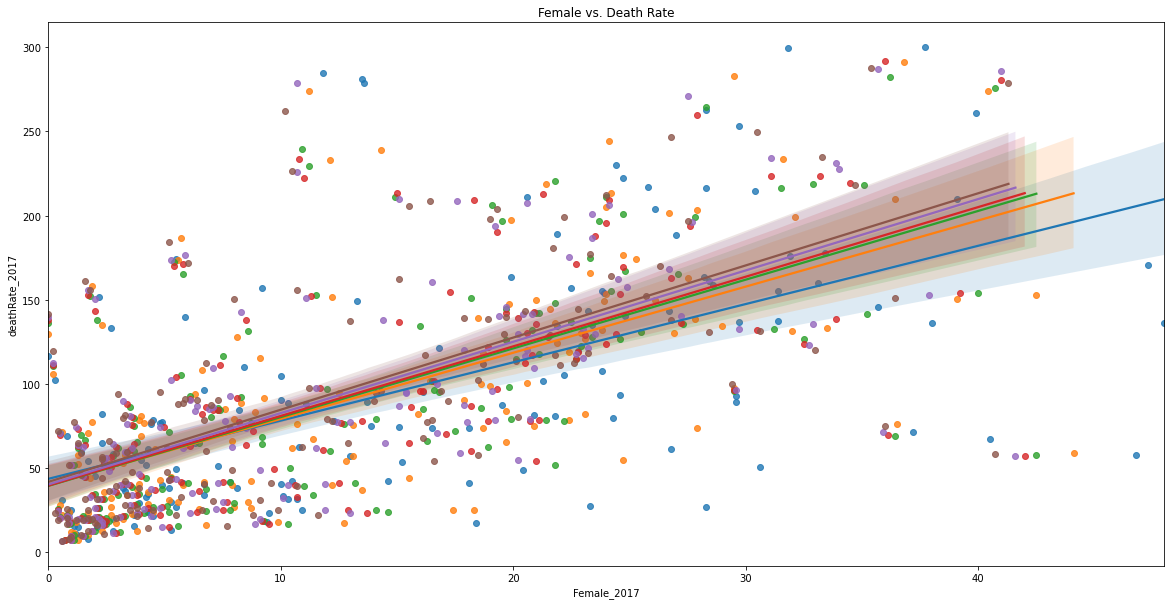

In [241]:
fig, ax = plt.subplots(figsize=(20,10))
for year in (2005,2010,2013,2014,2015,2017):
    sns.regplot(data = combined_female,
                   x="Female_" + str(year),
                   y="deathRate_" + str(year),
                    label =year)
plt.title("Female vs. Death Rate");

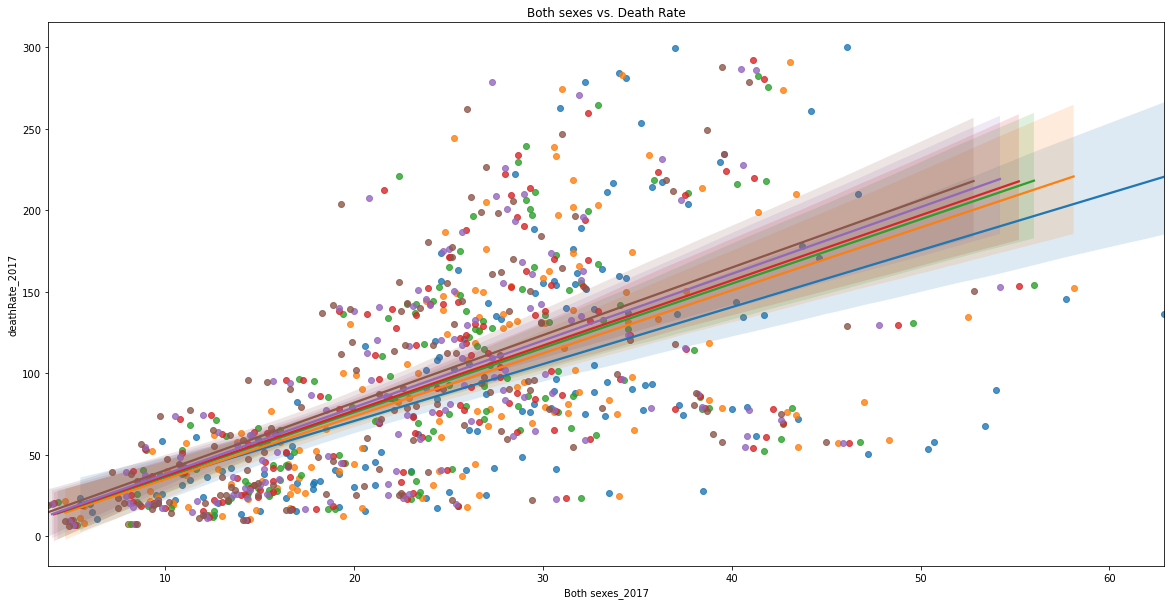

In [249]:
fig, ax = plt.subplots(figsize=(20,10))
for year in (2005,2010,2013,2014,2015,2017):
    sns.regplot(data = combined_both,
                   x="Both sexes_" + str(year),
                   y="deathRate_" + str(year),
                    label =year)
plt.title("Both sexes vs. Death Rate");

In [250]:
MilUsd

,MilUsd_1995,MilUsd_1996,MilUsd_1997,MilUsd_1998,MilUsd_1999,MilUsd_2000,MilUsd_2001,MilUsd_2002,MilUsd_2003,MilUsd_2004,...,MilUsd_2007,MilUsd_2008,MilUsd_2009,MilUsd_2010,MilUsd_2011,MilUsd_2012,MilUsd_2013,MilUsd_2014,MilUsd_2015,MilUsd_2016
Code,,,,,,,,,,,,,,,,,,,,,
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.517025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
AZE,NaN,NaN,NaN,NaN,NaN,3.240836,5.798243,1.697244,1.527268,1.933458,...,1.048800,2.799349,3.732349,6.104810,8.737646,6.491478,7.137931,9.817077,6.929778,7.457441
BIH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.469845,NaN,5.349070
BRA,NaN,NaN,NaN,NaN,NaN,2.475959,14.444471,1.262481,1.019495,4.268069,...,51.457204,77.499482,57.614741,55.702043,70.476139,70.444313,74.455796,90.393659,98.170738,NaN
BGR,NaN,NaN,NaN,84.073792,83.582222,68.761701,61.793146,59.702211,70.410275,136.498497,...,120.359680,164.533137,238.147426,167.863408,192.682559,181.991390,217.160178,103.786547,81.047382,45.813400
CAN,NaN,NaN,NaN,107.923144,NaN,NaN,131.653639,140.315700,134.256291,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,46.062496,NaN,NaN,47.834629
MAC,NaN,NaN,12.664114,NaN,NaN,NaN,0.373436,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HRV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.813474


In [251]:
[int(x.split("_")[1]) for x in MilUsd.columns]

[1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [252]:
death = death_rates_smoking_age[["deathRate_" + str(x) for x in range(1995,2016)]]

In [253]:
MilUsd = MilUsd[["MilUsd_" + str(x) for x in range(1995,2016)]]

In [254]:
combined_milusd=pd.concat([death, MilUsd.reindex(MilUsd.index)], axis=1)

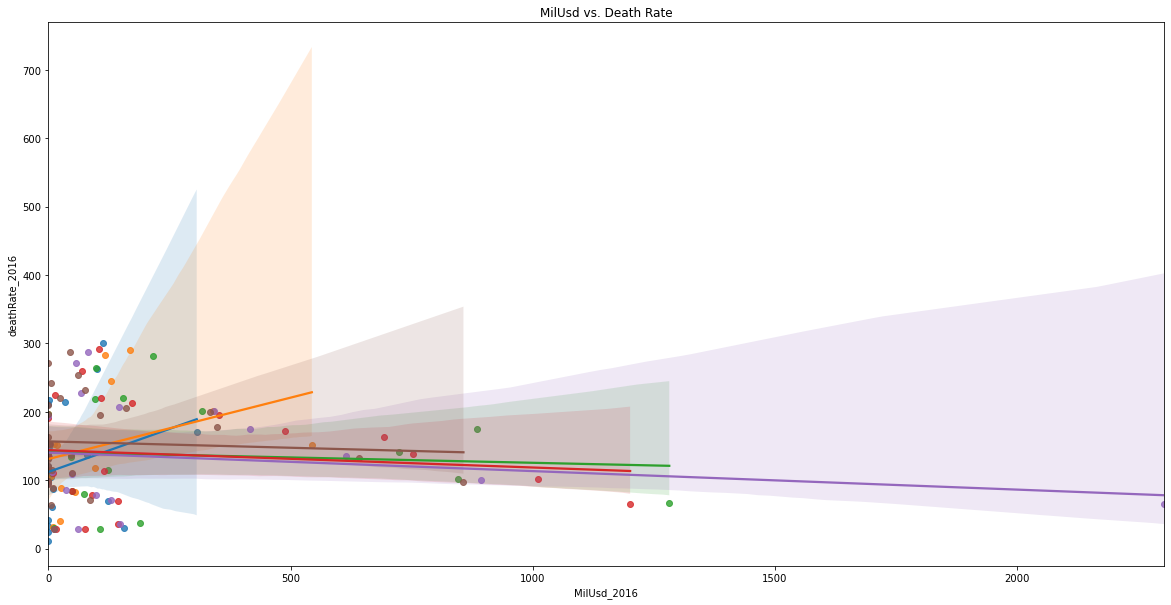

In [256]:
fig, ax = plt.subplots(figsize=(20,10))
for year in (2005,2010,2013,2014,2015,2016):
    sns.regplot(data = combined_milusd,
                   x="MilUsd_" + str(year),
                   y="deathRate_" + str(year),
                    label =year)
plt.title("MilUsd vs. Death Rate");

In [257]:
metricTons

,metricTons_1995,metricTons_1996,metricTons_1997,metricTons_1998,metricTons_1999,metricTons_2000,metricTons_2001,metricTons_2002,metricTons_2003,metricTons_2004,...,metricTons_2007,metricTons_2008,metricTons_2009,metricTons_2010,metricTons_2011,metricTons_2012,metricTons_2013,metricTons_2014,metricTons_2015,metricTons_2016
Code,,,,,,,,,,,,,,,,,,,,,
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DZA,7803.6,8307.1,8382.3,8497.5,8326.000,8145.8,7063.2,7099.6,7153.4,6976.0,...,7734.0,7103.0,8068.0,8273.0,8612.0,8130.0,8241.0,7648.0,7483.0,NaN
AUS,23083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
AZE,13585.0,8539.0,10134.0,5317.0,7761.000,5869.0,8622.0,4030.0,2293.0,2548.0,...,1038.8,1479.2,1543.0,2027.0,2558.7,1963.6,2112.0,2430.2,1691.5,1946.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GBR,5690.0,6665.0,7619.0,6958.0,8368.000,5540.0,NaN,NaN,NaN,5186.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TZA,14519.0,23586.0,25293.0,28197.0,15571.000,15107.0,17701.0,23805.0,21898.0,42080.0,...,57886.0,56193.0,75096.0,51548.0,54012.0,94420.0,77033.0,53965.0,52224.0,NaN
USA,NaN,58226.0,NaN,NaN,63672.566,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
[int(x.split("_")[1]) for x in metricTons.columns]

[1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [303]:
death = death_rates_smoking_age[["deathRate_" + str(x) for x in range(1995,2014)]]

In [304]:
metricTons = metricTons[["metricTons_" + str(x) for x in range(1995,2014)]]

In [287]:
combined_metricTons=pd.concat([death, metricTons.reindex(metricTons.index)], axis=1)

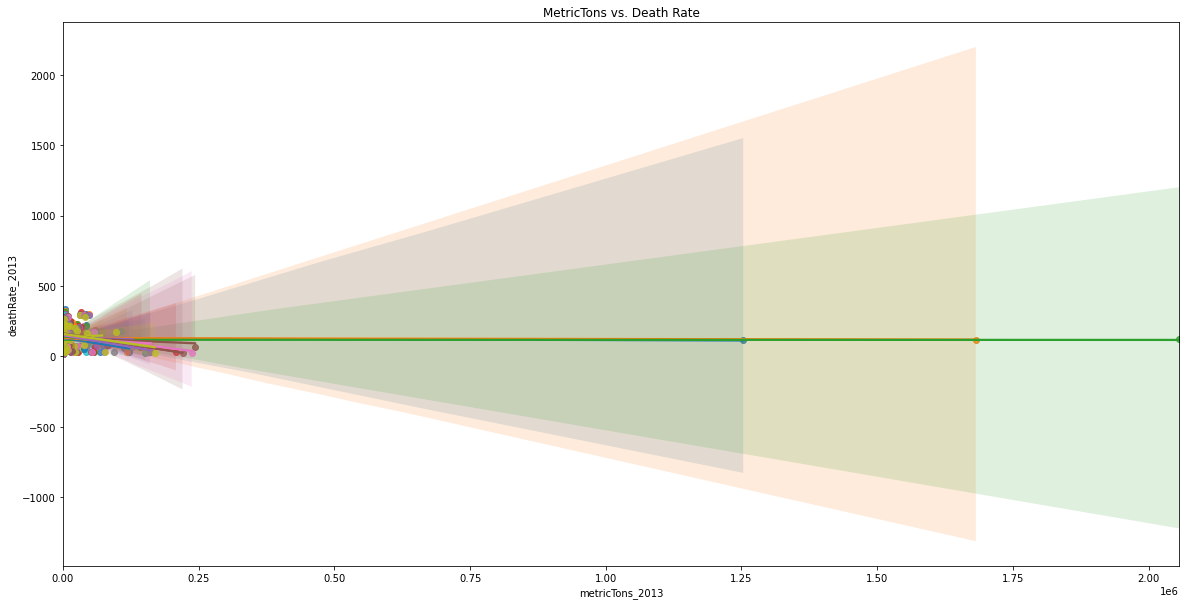

In [289]:
fig, ax = plt.subplots(figsize=(20,10))
for year in range(1995,2014):
    sns.regplot(data = combined_metricTons,
                   x="metricTons_" + str(year),
                   y="deathRate_" + str(year),
                    label =year)
plt.title("MetricTons vs. Death Rate");

In [573]:
stop_smoking

,AvgCigarettePriceDollars_2012,AvgCigarettePriceDollars_2014,AvgTaxesAsPctCigarettePrice_2012,AvgTaxesAsPctCigarettePrice_2014,EnforceBansTobaccoAd_2007,EnforceBansTobaccoAd_2010,EnforceBansTobaccoAd_2012,EnforceBansTobaccoAd_2014,HelpToQuit_2007,HelpToQuit_2010,HelpToQuit_2012,HelpToQuit_2014
Code,,,,,,,,,,,,
AFG,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
AGO,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0
ALB,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,2.0,3.0,4.0,4.0
AND,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0
ARE,1.55,1.82,24.5,21.1,4.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,5.96,NaN,59.5,NaN,2.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
YEM,1.71,1.94,52.9,53.7,4.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0
ZAF,5.16,5.48,47.6,48.1,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0


In [574]:
death

,deathRate_2008,deathRate_2010,deathRate_2012,deathRate_2014
Code,,,,
AFG,31.987048,30.217384,28.781991,27.932338
AGO,38.334680,36.474249,35.259244,32.861465
ALB,109.281032,115.427724,125.819761,138.039816
AND,93.900754,97.479604,94.117218,96.203202
ARE,12.740261,12.190815,15.153034,18.850733
...,...,...,...,...
WSM,82.323431,83.799083,85.233666,86.721893
YEM,40.594763,39.816276,39.648357,39.668574
ZAF,84.224488,74.751062,65.676539,59.963270


In [575]:
combined_stop_smoking=pd.concat([death, stop_smoking.reindex(stop_smoking.index)], axis=1)

In [576]:
combined_stop_smoking

,deathRate_2008,deathRate_2010,deathRate_2012,deathRate_2014,AvgCigarettePriceDollars_2012,AvgCigarettePriceDollars_2014,AvgTaxesAsPctCigarettePrice_2012,AvgTaxesAsPctCigarettePrice_2014,EnforceBansTobaccoAd_2007,EnforceBansTobaccoAd_2010,EnforceBansTobaccoAd_2012,EnforceBansTobaccoAd_2014,HelpToQuit_2007,HelpToQuit_2010,HelpToQuit_2012,HelpToQuit_2014
Code,,,,,,,,,,,,,,,,
AFG,31.987048,30.217384,28.781991,27.932338,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
AGO,38.334680,36.474249,35.259244,32.861465,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0
ALB,109.281032,115.427724,125.819761,138.039816,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,2.0,3.0,4.0,4.0
AND,93.900754,97.479604,94.117218,96.203202,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0
ARE,12.740261,12.190815,15.153034,18.850733,1.55,1.82,24.5,21.1,4.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NIU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0
NRU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
PLW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0


In [578]:
death = combined_stop_smoking[["deathRate_" + str(x) for x in (2012,2014)]]

In [579]:
avgprice = stop_smoking[["AvgCigarettePriceDollars_" + str(x) for x in (2012,2014)]]

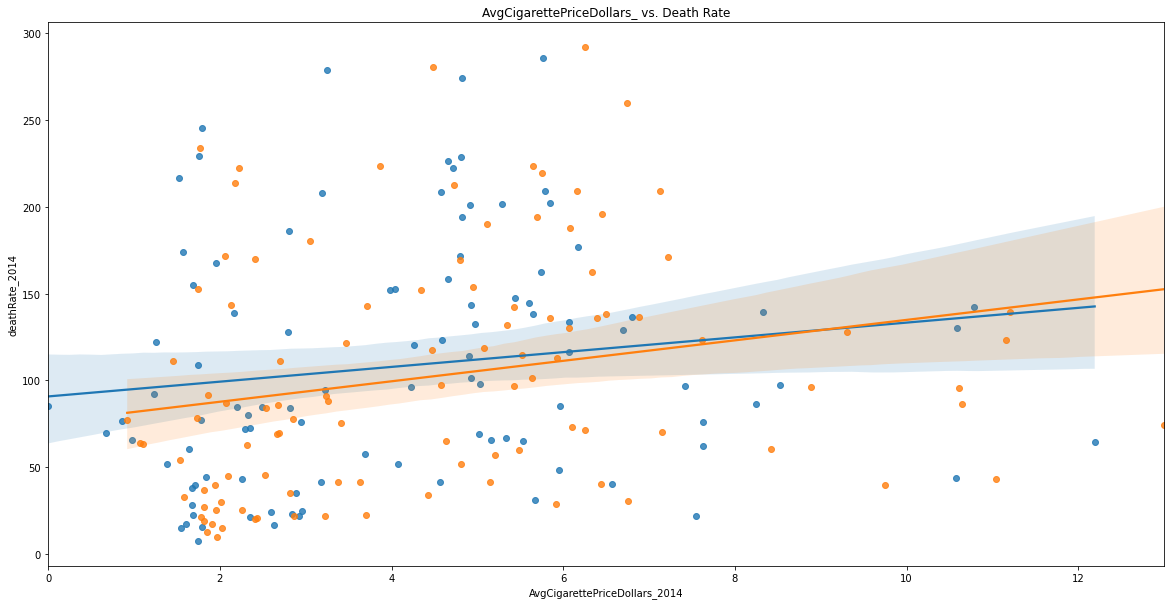

In [580]:
fig, ax = plt.subplots(figsize=(20,10))
for year in (2012,2014):
    sns.regplot(data = combined_stop_smoking,
                   x="AvgCigarettePriceDollars_" + str(year),
                   y="deathRate_" + str(year),
                    label =year)
plt.title("AvgCigarettePriceDollars_ vs. Death Rate");

In [581]:
avgtax = stop_smoking[["AvgTaxesAsPctCigarettePrice_" + str(x) for x in (2012,2014)]]

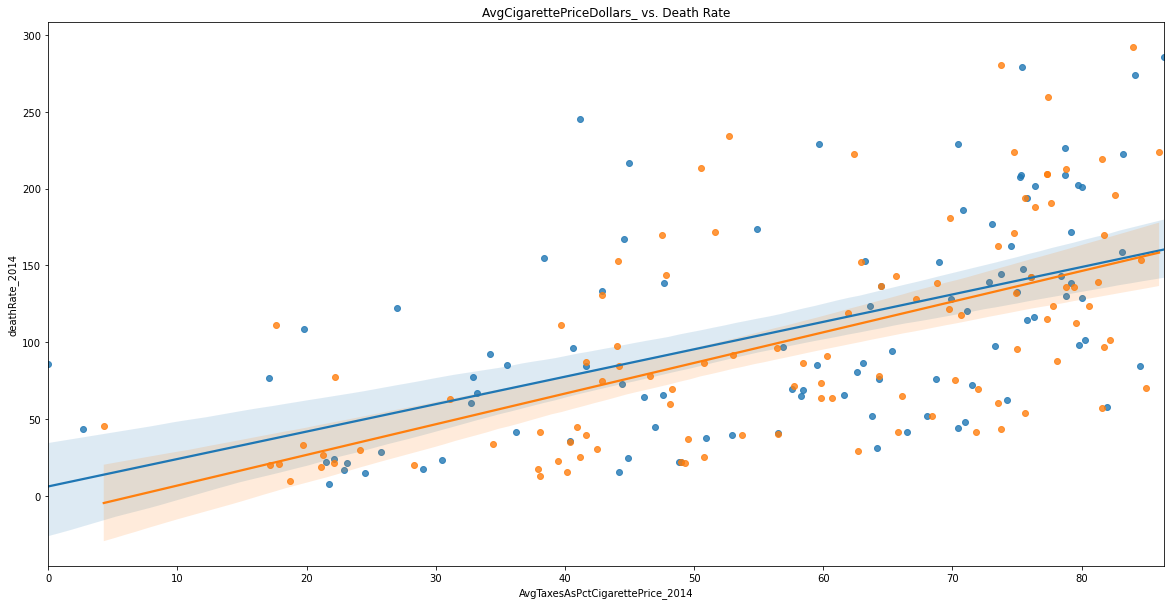

In [582]:
fig, ax = plt.subplots(figsize=(20,10))
for year in (2012,2014):
    sns.regplot(data = combined_stop_smoking,
                   x="AvgTaxesAsPctCigarettePrice_" + str(year),
                   y="deathRate_" + str(year),
                    label =year)
plt.title("AvgCigarettePriceDollars_ vs. Death Rate");

In [583]:
enforce = stop_smoking[["EnforceBansTobaccoAd_" + str(x) for x in (2010,2012,2014)]]

In [585]:
death = combined_stop_smoking[["deathRate_" + str(x) for x in (2010,2012,2014)]]

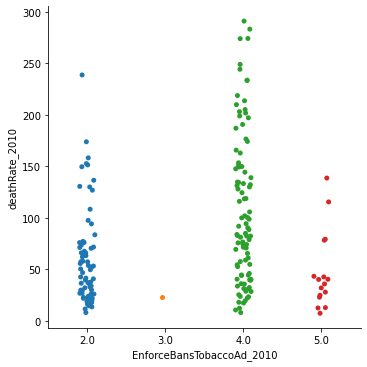

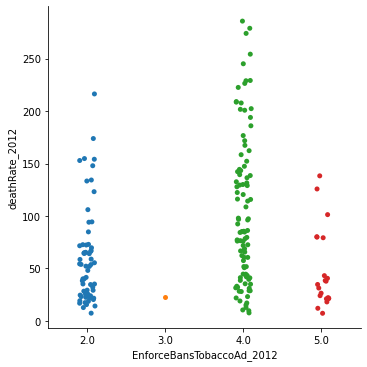

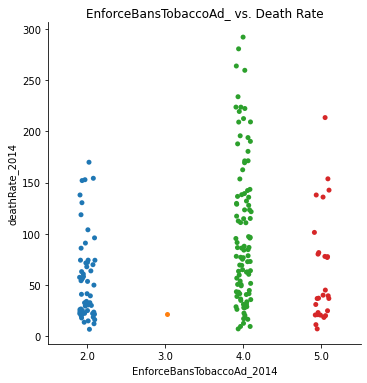

In [591]:
for year in (2010,2012,2014):
    sns.catplot(data = combined_stop_smoking,
                   x="EnforceBansTobaccoAd_" + str(year),
                   y="deathRate_" + str(year),
                    label =year)
plt.title("EnforceBansTobaccoAd_ vs. Death Rate");

In [592]:
helptoquite = stop_smoking[["HelpToQuit_" + str(x) for x in (2010,2012,2014)]]

In [ ]:
death = combined_stop_smoking[["deathRate_" + str(x) for x in (2010,2012,2014)]]